## Plot results of mutation detection experiments

#### For now, we are running mutation detection experiments for the below genes (TP53, etc) for comparison with the figures in the BioBombe manuscript.

#### This gives a diversity of prediction difficulties (e.g. TP53 is fairly easy to predict, TTN is used as a negative control ,etc) but eventually we can run this for all of the top 50 mutated genes in TCGA.

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import config as cfg
%matplotlib inline

In [5]:
genes = ['TP53', 'PTEN', 'PIK3CA', 'KRAS', 'TTN']
results_dir = os.path.join(cfg.repo_root, 'results', 'mutation')
df = None
raw_df = None
for gene_name in genes:
    results_file = os.path.join(os.path.abspath(results_dir),
                                gene_name,
                                '{}_classify_metrics.tsv.gz'.format(gene_name))
    results_df = pd.read_csv(results_file, sep='\t')
    if df is None:
        df = results_df
    else:
        df = pd.concat((df, results_df))
    raw_file = os.path.join(os.path.abspath(results_dir),
                                gene_name,
                                '{}_raw_classify_metrics.tsv.gz'.format(gene_name))
    raw_file_df = pd.read_csv(raw_file, sep='\t')
    if raw_df is None:
        raw_df = raw_file_df
    else:
        raw_df = pd.concat((raw_df, raw_file_df))
df = df[df['data_type'] == 'cv']
raw_df = raw_df[raw_df['data_type'] == 'cv']
df.head(n=10)

,auroc,aupr,gene_or_cancertype,signal,z_dim,seed,algorithm,data_type
2,0.77613,0.75675,TP53,signal,20,121958,pca,cv
5,0.76535,0.72733,TP53,signal,20,121958,nmf,cv
8,0.77791,0.75856,TP53,signal,20,259178,pca,cv
11,0.76975,0.73357,TP53,signal,20,259178,nmf,cv
14,0.77788,0.75837,TP53,signal,20,365838,pca,cv
17,0.76968,0.73345,TP53,signal,20,365838,nmf,cv
20,0.77788,0.75845,TP53,signal,20,671155,pca,cv
23,0.76966,0.73209,TP53,signal,20,671155,nmf,cv
26,0.77765,0.75822,TP53,signal,20,131932,pca,cv
29,0.76969,0.73418,TP53,signal,20,131932,nmf,cv


In [6]:
raw_df.head(n=10)

,auroc,aupr,gene_or_cancertype,signal,z_dim,seed,algorithm,data_type
2,0.91745,0.88292,TP53,signal,8000,42,raw,cv
5,0.59006,0.53429,TP53,shuffled,8000,42,raw,cv
2,0.91738,0.73812,PTEN,signal,8000,42,raw,cv
5,0.65114,0.37358,PTEN,shuffled,8000,42,raw,cv
2,0.80113,0.60646,PIK3CA,signal,8000,42,raw,cv
5,0.52687,0.29983,PIK3CA,shuffled,8000,42,raw,cv
2,0.86891,0.73027,KRAS,signal,8000,42,raw,cv
5,0.54315,0.27675,KRAS,shuffled,8000,42,raw,cv
2,0.79047,0.67783,TTN,signal,8000,42,raw,cv
5,0.80254,0.68632,TTN,shuffled,8000,42,raw,cv


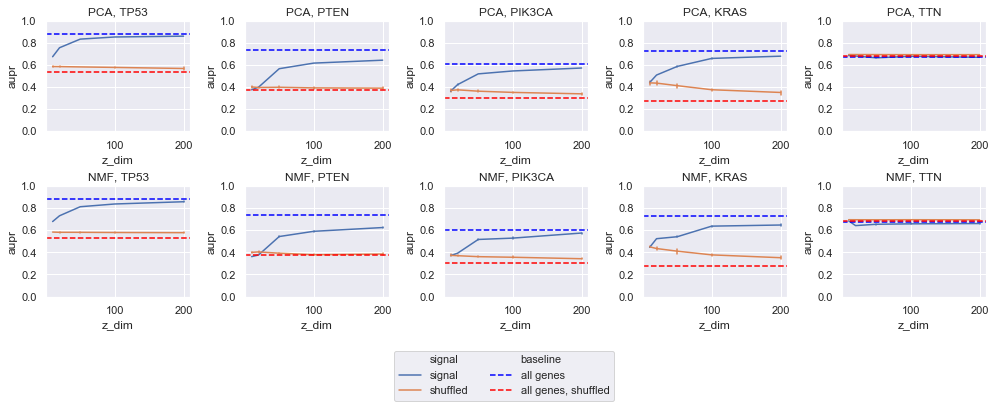

In [39]:
import warnings

sns.set()
fig, axarr = plt.subplots(2, 5)
fig.set_figwidth(14)
fig.set_figheight(6)

with warnings.catch_warnings():
    # filter deprecation warning in scipy
    warnings.filterwarnings('ignore', category=FutureWarning)
    for a_ix, alg in enumerate(['pca', 'nmf']):
        for g_ix, gene_name in enumerate(genes):
            ax = axarr[a_ix, g_ix]
            gene_df = df[(df['gene_or_cancertype'] == gene_name) & 
                         (df['algorithm'] == alg)]
            sns.lineplot(data=gene_df, x='z_dim', y='aupr', hue='signal', 
                         err_style='bars', ax=ax)
            raw_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                              (raw_df['signal'] == 'signal')]['aupr'].values[0]
            shuffled_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                                   (raw_df['signal'] == 'shuffled')]['aupr'].values[0]
            ax.axhline(y=raw_aupr, color='blue', linestyle='--', label='all genes')
            ax.axhline(y=shuffled_aupr, color='red', linestyle='--', label='all genes, shuffled')
            ax.set_ylim((0.0, 1.0))
            if a_ix == 1 and g_ix == len(genes)-1:
                handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()
            ax.set_title('{}, {}'.format(alg.upper(), gene_name))
plt.tight_layout(h_pad=2)
fig.subplots_adjust(bottom=0.3)
labels.insert(3, 'baseline')
handles.insert(3, handles[0])
plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.025), ncol=2)